<a href="https://colab.research.google.com/github/Divyakalgaiya/LSTM-model/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Mini-Project : End-to-end project using Neural Networks



Task: Implement a feedforward neural network (FNN) or CNN or RNN or any variations of these, for a classification or regression problem, applying techniques like hyperparameter tuning, optimization, and regularization.


* Model: LSTM
* Regression problem

# Step 1 : Import necessary libraries

In [ ]:
! pip install ucimlrepo
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.4 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import plotly.express as px
import tensorflow as tf
import optuna
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers

# Step 2: Data loading and data preprocessing

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
beijing_pm2_5 = fetch_ucirepo(id=381)

# data (as pandas dataframes)
X = beijing_pm2_5.data.features
y = beijing_pm2_5.data.targets
display(X.head())
display(y.head())
print("Missing values",X.isnull().sum())
print("Missing values",y.isnull().sum())
print(X.shape)
print(y.shape)
print(beijing_pm2_5.metadata)

# variable information
print(beijing_pm2_5.variables)
display(X.describe())
display(y.describe())

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,-20,-12.0,1018.0,NW,12.97,0,0


,pm2.5
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


Missing values year     0
month    0
day      0
hour     0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64
Missing values pm2.5    2067
dtype: int64
(43824, 11)
(43824, 1)
{'uci_id': 381, 'name': 'Beijing PM2.5', 'repository_url': 'https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data', 'data_url': 'https://archive.ics.uci.edu/static/public/381/data.csv', 'abstract': 'This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included. ', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 43824, 'num_features': 11, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['pm2.5'], 'index_col': ['No'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/

,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


,pm2.5
count,41757.000000
mean,98.613215
std,92.050387
min,0.000000
25%,29.000000
50%,72.000000
75%,137.000000
max,994.000000


Dataset: This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.
* Dataset Characteristics: Multivariate, Time-Series

* Subject Area: Climate and Environment

* Associated Tasks: Regression

* Feature Type: Integer, Real

* Instances: 43824

* Features: 11

There are 2067 missing values in the column pm 2.5.(PM stands for particulate matter, a mixture of solid particles and liquid droplets found in the air. PM2.5 are fine particles that pose the greatest risk to health and visibility. )
* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* pm2.5: PM2.5 concentration (ug/m^3)
* DEWP: Dew Point (â„ƒ)
* TEMP: Temperature (â„ƒ)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* Is: Cumulated hours of snow
* Ir: Cumulated hours of rain

In [ ]:
df=pd.concat([X,y],axis=1)
df.head(-1)

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
0,2010,1,1,0,-21,-11.0,1021.0,NW,1.79,0,0,NaN
1,2010,1,1,1,-21,-12.0,1020.0,NW,4.92,0,0,NaN
2,2010,1,1,2,-21,-11.0,1019.0,NW,6.71,0,0,NaN
3,2010,1,1,3,-21,-14.0,1019.0,NW,9.84,0,0,NaN
4,2010,1,1,4,-20,-12.0,1018.0,NW,12.97,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
43818,2014,12,31,18,-22,-2.0,1033.0,NW,226.16,0,0,10.0
43819,2014,12,31,19,-23,-2.0,1034.0,NW,231.97,0,0,8.0
43820,2014,12,31,20,-22,-3.0,1034.0,NW,237.78,0,0,10.0
43821,2014,12,31,21,-22,-3.0,1034.0,NW,242.70,0,0,10.0


In [ ]:
# Group data by year and calculate the mean PM2.5 for each year
year_pm_mean = df.groupby('year')['pm2.5'].mean()

# Find the year with the maximum mean PM2.5
max_pm_year = year_pm_mean.idxmax()
max_pm_value = year_pm_mean.max()  # Get the maximum value

# Print the result
print(f"The year with the maximum average PM2.5 concentration is: {max_pm_year}")
print(f"The maximum average PM2.5 concentration is: {max_pm_value}")
# Group data by year and calculate the mean PM2.5 for each year
year_pm_mean = df.groupby('year')['pm2.5'].mean()

# Find the year with the maximum mean PM2.5
min_pm_year = year_pm_mean.idxmin()
min_pm_value = year_pm_mean.min()  # Get the maximum value

# Print the result
print(f"The year with the minimum average PM2.5 concentration is: {min_pm_year}")
print(f"The minimum average PM2.5 concentration is: {min_pm_value}")


The year with the maximum average PM2.5 concentration is: 2010
The maximum average PM2.5 concentration is: 104.04572982326042
The year with the minimum average PM2.5 concentration is: 2012
The minimum average PM2.5 concentration is: 90.5458710066305


In [ ]:
# Assuming 'df' is your DataFrame with 'year' and 'pm2.5' columns
fig = px.box(df, x='year', y='pm2.5', title='Interactive Boxplot of PM2.5 Concentration by Year')
fig.show()

There are outliers in the data. For year=2010, min value=1 and maximum value is 980.

In time-series data like the Beijing PM2.5 dataset, backward fill (bfill) and forward fill (ffill) are simple but effective strategies to handle missing values.

* Forward filling involves replacing a missing value with the last observed value.
* Backward filling involves replacing a missing value with the next observed value.

In [ ]:
df['pm2.5'] = df['pm2.5'].ffill()
df['pm2.5']=df['pm2.5'].bfill()
print("Total missing values:",df.isnull().sum().sum())
display(df.describe())

Total missing values: 0


,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir,pm2.5
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916,97.801114
std,1.413842,3.448572,8.799425,6.922266,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867,91.376429
min,2010.000000,1.000000,1.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,29.000000
50%,2012.000000,7.000000,16.000000,11.500000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,72.000000
75%,2013.000000,10.000000,23.000000,17.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,136.000000
max,2014.000000,12.000000,31.000000,23.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000,994.000000


Normalization is the process of scaling individual samples to have unit norm.

In [ ]:
# Select numerical features for normalization
numerical_features = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'pm2.5']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the selected features
scaler.fit(df[numerical_features])

# Transform the selected features and update the DataFrame
df[numerical_features] = scaler.transform(df[numerical_features])
display(df.head())

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
0,2010,1,1,0,0.279412,0.131148,0.545455,NW,0.002290,0.0,0.0,0.129779
1,2010,1,1,1,0.279412,0.114754,0.527273,NW,0.007639,0.0,0.0,0.129779
2,2010,1,1,2,0.279412,0.131148,0.509091,NW,0.010698,0.0,0.0,0.129779
3,2010,1,1,3,0.279412,0.081967,0.509091,NW,0.016047,0.0,0.0,0.129779
4,2010,1,1,4,0.294118,0.114754,0.490909,NW,0.021396,0.0,0.0,0.129779


In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.set_index('datetime')
df.head()
# Convert 'cbwd' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['cbwd'], prefix=['cbwd'])


In [ ]:
sequence_length = 24  # Number of past hours

# Create sequences for X and y
X_data = []
y_data = []
for i in range(sequence_length, len(df)):
    X_data.append(df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']].iloc[i - sequence_length:i].values)
    y_data.append(df['pm2.5'].iloc[i])

# Convert to NumPy arrays
X_data = np.array(X_data)
y_data = np.array(y_data)

# Reshape X_data for LSTM input (samples, timesteps, features)
X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], X_data.shape[2]))

In [ ]:
# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


# Step 3: Build and evaluate the Base model

Long Short-Term Memory (LSTM) where designed to address the vanishing gradient issue faced by traditional RNNs when learning long-term dependencies in sequential data. LSTMs are capable of maintaining information over extended periods because of memory cells and gating mechanisms.

In [ ]:
base_model = Sequential()
base_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
base_model.add(Dropout(0.3))
base_model.add(LSTM(units=128))
base_model.add(Dropout(0.3))
base_model.add(Dense(1))

base_model.compile(optimizer='adam', loss='mean_squared_error')
history = base_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
val_loss=history.history['val_loss'][-1]
print("Validation Loss:", val_loss)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 85s 82ms/step - loss: 0.0037 - val_loss: 8.3335e-04
Epoch 2/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - loss: 9.2866e-04 - val_loss: 7.3348e-04
Epoch 3/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 89s 90ms/step - loss: 7.9375e-04 - val_loss: 6.8583e-04
Epoch 4/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 133s 81ms/step - loss: 7.1736e-04 - val_loss: 6.0234e-04
Epoch 5/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - loss: 6.6004e-04 - val_loss: 5.7942e-04
Epoch 6/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - loss: 7.0691e-04 - val_loss: 6.8249e-04
Epoch 7/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - loss: 6.4451e-04 - val_loss: 6.0225e-04
Epoch 8/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - loss: 6.2372e-04 - val_loss: 5.8662e-04
Epoch 9/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - loss: 6.3252e-04 - val_loss: 5.9055e-04
Epoch 10/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - loss: 6.6696e-04 - val_loss: 6.7190e-04
Validation Loss: 0.000671898655127734


* The model consists of two LSTM layers, each with 128 units, and a dropout layer after each to prevent overfitting.
* The model concludes with a Dense layer to predict a single value.(pm2.5)

Explanation:

hidden_units: Number of neurons in the hidden layer (default = 128)

dropout_rate: Dropout helps in shrinking the squared norm of the weights and this tends to a reduction in overfitting. Randomly sets 30% of the neurons to zero during training.

optimizer: Optimization algorithm used to minimize the loss.(adam)

Dense(hidden_units): A fully connected layer with hidden_units neurons.

#Compile the model
* Optimizer: The Adam optimizer adjusts the learning rate based on first and second moments of the gradients.
* oss='mean_squared_error': This defines the loss function that the model will try to minimize during training.

In [ ]:
predictions = base_model.predict(X_test)
 #Reshape predictions to have a single column representing 'pm2.5'
predictions = predictions.reshape(-1, 1)
pm25_scaler = MinMaxScaler()
pm25_scaler.fit(df[['pm2.5']])


# Inverse transform
predictions = pm25_scaler.inverse_transform(predictions).flatten()
y_test_pm25 = y_test

#Inverse transform y_test_pm25
y_test_pm25 = pm25_scaler.inverse_transform(y_test_pm25.reshape(-1,1)).flatten()

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test_pm25 - predictions)**2))
print(f'RMSE: {rmse:.4f}')

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print('R-squared:', r2)


274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
RMSE: 0.0264
R-squared: 0.9206049299265027


# Regression model evaluation metrics

The MSE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

For the base model,
* MSE=0.000671898655127734
* RMSE: 0.0264
* R-squared: 0.9206049299265027


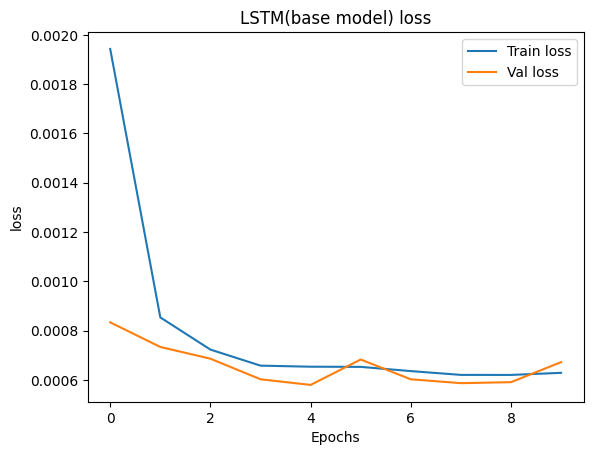

In [ ]:
# Plot the training and validation loss for each model
def plot_history(history, model_name):
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Val loss')
    plt.title(f'{model_name} loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Plot results
plot_history(history, 'LSTM(base model)')

* The training loss decreases rapidly from ~0.0019 to ~0.0006 in just 8 epochs.
* The validation loss mirrors the training loss.
* There are slight fluctuations in the validation loss.

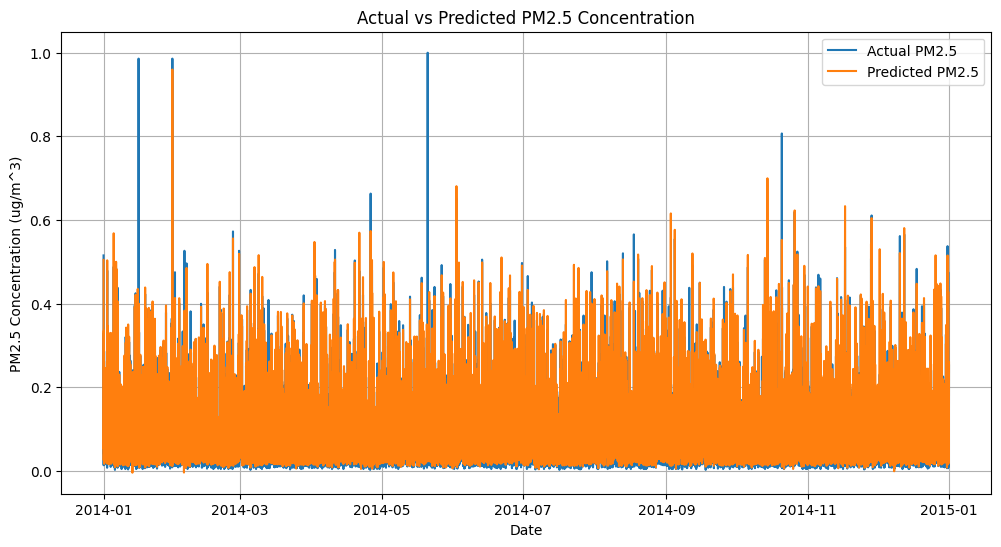

In [ ]:
# Generate a date range for the test set
dates_test = pd.date_range(start=df.index[-len(y_test)], periods=len(y_test), freq='h')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_pm25, label='Actual PM2.5')
plt.plot(dates_test, predictions, label='Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5 Concentration')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (ug/m^3)')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Hyperparameter tuning

Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters.

# Step 4.1: Manual grid search
Manual Grid Search is a hyperparameter tuning technique in which we
manually define a list of hyperparameter combinations (like hidden units, optimizers, dropout, etc.).

L2 regularization adds a penalty to the loss function to discourage the model from learning overly large weights.
This helps prevent overfitting by keeping the model weights smaller and more generalizable.

In [ ]:
def build_model(units=128, dropout_rate=0.1, l2_reg=1e-4, learning_rate=1e-3, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2]),
                   kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    opt = Adam(learning_rate=learning_rate) if optimizer == 'adam' else SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mean_squared_error')
    return model

In [ ]:
param_grid = [
    {"units": 128, "dropout_rate": 0.2,"l2_reg":1e-4,"learning_rate":0.001, "optimizer": "adam"},
    {"units": 128, "dropout_rate": 0.2, "l2_reg":1e-4,"learning_rate":0.001, "optimizer": "sgd"},
]

# Define the EarlyStopping callback before the loop
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

for params in param_grid:
    model = build_model(**params)
    history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                        validation_data=(X_test, y_test), verbose=0, callbacks=[early_stop])
    val_loss = history.history['val_loss'][-1]
    val_mse = history.history['val_loss'][-1]
    print("Validation Loss:", val_loss)
    print("Validation MSE:", val_mse)
    print("Parameters:", params)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Validation Loss: 0.001122634275816381
Validation MSE: 0.001122634275816381
Parameters: {'units': 128, 'dropout_rate': 0.2, 'l2_reg': 0.0001, 'learning_rate': 0.001, 'optimizer': 'adam'}
Validation Loss: 0.028790870681405067
Validation MSE: 0.028790870681405067
Parameters: {'units': 128, 'dropout_rate': 0.2, 'l2_reg': 0.0001, 'learning_rate': 0.001, 'optimizer': 'sgd'}


Explanation:
* Epochs=5 (The model will train for 5 iterations over the entire dataset.)
* batch_size=64
* Optimizers: Adam and sgd
* Train the model and evaluate the mse.


Result:
Best hyperparameters are {'units': 128, 'dropout_rate': 0.2, 'l2_reg': 0.0001, 'learning_rate': 0.001, 'optimizer': 'adam'}. Validation MSE: 0.001122634275816381
* Adam optimizer clearly outperforms SGD.
*  Adam optimizer is more suitable for this task.
* The validation MSE with learning rate and regularization is greater than the validation mse for base model.  


# Step 4.2: Random search                                           
In random search, instead of trying every possible combination like in grid search, it randomly sample a fixed number of combinations from the hyperparameter space.

In [ ]:
import random

def random_params(param_grid, n_samples):
    """Generates random hyperparameter combinations."""
    return [
        {
            "units": random.choice(param_grid["units"]),
            "dropout_rate": random.choice(param_grid["dropout_rate"]),
            "optimizer": random.choice(param_grid["optimizer"])
            ,"l2_reg": random.choice(param_grid["l2_reg"]),
            "learning_rate": random.choice(param_grid["learning_rate"])
        }
        for _ in range(n_samples)
    ]

param_choices = {
    "units": [64, 128],
    "dropout_rate": [0.1, 0.3],
    "optimizer": ["adam"],
    "l2_reg": [1e-4, 1e-5],
    "learning_rate": [1e-2, 1e-3]
}

samples = random_params(param_choices, n_samples=5)
best_params = None
best_val_loss = float('inf')  # Initialize with a very large value

for params in samples:
    model = build_model(**params)
    history = model.fit(
        X_train,
        y_train,
        epochs=5,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=0,
    )
    val_loss = history.history['val_loss'][-1]
    print(f"Params: {params}, Val loss: {val_loss:.4f}")

    if val_loss < best_val_loss:  # Check for lower validation loss
        best_val_loss = val_loss
        best_params = params

print("Best hyperparameters:", best_params)

Params: {'units': 128, 'dropout_rate': 0.1, 'optimizer': 'adam', 'l2_reg': 1e-05, 'learning_rate': 0.001}, Val loss: 0.0007
Params: {'units': 64, 'dropout_rate': 0.1, 'optimizer': 'adam', 'l2_reg': 1e-05, 'learning_rate': 0.001}, Val loss: 0.0007
Params: {'units': 64, 'dropout_rate': 0.3, 'optimizer': 'adam', 'l2_reg': 0.0001, 'learning_rate': 0.001}, Val loss: 0.0010
Params: {'units': 128, 'dropout_rate': 0.1, 'optimizer': 'adam', 'l2_reg': 0.0001, 'learning_rate': 0.001}, Val loss: 0.0011
Params: {'units': 128, 'dropout_rate': 0.1, 'optimizer': 'adam', 'l2_reg': 1e-05, 'learning_rate': 0.01}, Val loss: 0.0009
Best hyperparameters: {'units': 128, 'dropout_rate': 0.1, 'optimizer': 'adam', 'l2_reg': 1e-05, 'learning_rate': 0.001}


* "units": [64, 128]
    * 64 units: A moderate capacity that works well for many time-series tasks without overfitting.
    * 128 units: Doubles capacity to capture more complex patterns.
* "dropout_rate": [0.1, 0.3]
    * 0.1: Mild regularization for small datasets.
    *  0.3: Stronger regularization to prevent overfitting on noisy pollution data.
*   "optimizer": ["adam"]
   * Adam optimizer outperforms sgd.
*    "l2_reg": [1e-4, 1e-5]
    *
*   "learning_rate": [1e-2, 1e-3]
     * 1e-2: Aggressive learning for fast convergence.

    * 1e-3: Default for Adam.

Result: Best hyperparameters: {'units': 128, 'dropout_rate': 0.1, 'optimizer': 'adam', 'l2_reg': 1e-05, 'learning_rate': 0.001}. Val_loss=0.0007.
* The model performs better with a learning rate of 0.001 than with 0.01.

* The model performs better with less L2 regularization.

# Step 4.3 Bayesian Optimization
Bayesian Optimization is an automated optimization technique designed to find optimal hyperparameters by treating the search process as an optimization problem.


In [ ]:
def objective(trial):
    units = trial.suggest_int("units", 64, 128, step=32) # Changed to 'units'
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.3)
    optimizer = trial.suggest_categorical("optimizer", ["adam"])
    l2_reg = trial.suggest_float("l2_reg", 1e-7, 1e-6, log=True)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.004, log=True)
    model = build_model(units=units, dropout_rate=dropout_rate, optimizer=optimizer,
                        l2_reg=l2_reg, learning_rate=learning_rate)

    # Fit with validation data to monitor performance during trials
    history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                        validation_data=(X_test, y_test), verbose=0)

    # Use validation loss as the objective to minimize
    val_loss = history.history['val_loss'][-1]
    return val_loss  # Optuna will try to minimize this value

study = optuna.create_study(direction="minimize")  # Minimize validation loss
study.optimize(objective, n_trials=5) # Keep n_trials small for demonstration

best_trial = study.best_trial
print("Best score (validation loss):", best_trial.value)
print("Best hyperparameters:", best_trial.params)

[I 2025-05-17 05:19:18,402] A new study created in memory with name: no-name-cecb2852-0bb0-4619-a52c-42654894224d
[I 2025-05-17 05:22:18,049] Trial 0 finished with value: 0.0006383083527907729 and parameters: {'units': 64, 'dropout_rate': 0.1934372635894884, 'optimizer': 'adam', 'l2_reg': 3.366984358811572e-07, 'learning_rate': 0.0013380510711764521}. Best is trial 0 with value: 0.0006383083527907729.
[I 2025-05-17 05:29:01,285] Trial 1 finished with value: 0.00076422153506428 and parameters: {'units': 128, 'dropout_rate': 0.28625657669334026, 'optimizer': 'adam', 'l2_reg': 7.077085250211013e-07, 'learning_rate': 0.002893499445655035}. Best is trial 0 with value: 0.0006383083527907729.
[I 2025-05-17 05:32:15,153] Trial 2 finished with value: 0.0006777362432330847 and parameters: {'units': 64, 'dropout_rate': 0.14537962343101946, 'optimizer': 'adam', 'l2_reg': 1.4105896394394642e-07, 'learning_rate': 0.0022605034839612344}. Best is trial 0 with value: 0.0006383083527907729.
[I 2025-05-1

Best score (validation loss): 0.0006383083527907729
Best hyperparameters: {'units': 64, 'dropout_rate': 0.1934372635894884, 'optimizer': 'adam', 'l2_reg': 3.366984358811572e-07, 'learning_rate': 0.0013380510711764521}


Explanation: The validation loss for base model is less than the validation loss after hyperparameter tuning. So, i reduced the l2 regularization value.


* Best score (validation loss): 0.0006383083527907729
* Best hyperparameters: {'units': 64, 'dropout_rate': 0.1934372635894884, 'optimizer': 'adam', 'l2_reg': 3.366984358811572e-07, 'learning_rate': 0.0013380510711764521}
* The performance of model improves after reducing the l2 regularization.

Training  model with best hyperparameters: {'units': 64, 'dropout_rate': 0.1934372635894884, 'optimizer': 'adam', 'l2_reg': 3.366984358811572e-07, 'learning_rate': 0.0013380510711764521}
Epoch 1/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 0.0028 - val_loss: 8.6967e-04
Epoch 2/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 8.5886e-04 - val_loss: 6.4820e-04
Epoch 3/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - loss: 6.7935e-04 - val_loss: 6.3704e-04
Epoch 4/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - loss: 6.6395e-04 - val_loss: 7.0772e-04
Epoch 5/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 6.6244e-04 - val_loss: 6.0473e-04
Epoch 6/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 6.1157e-04 - val_loss: 6.2544e-04
Epoch 7/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 6.4102e-04 - val_loss: 5.9843e-04
Epoch 8/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - loss: 6.6666e-04 - val_loss: 6.2247e-04
Epoch 9/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/

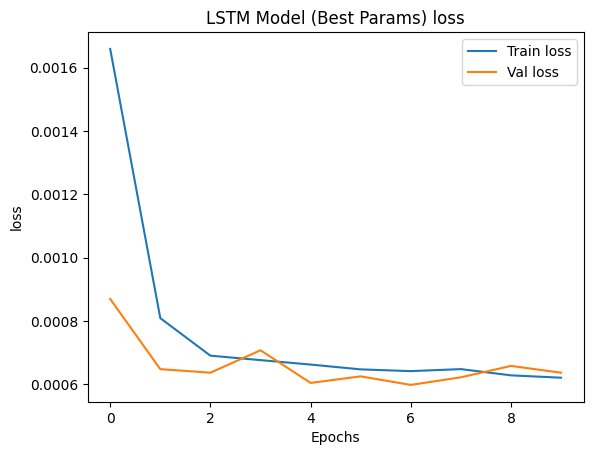

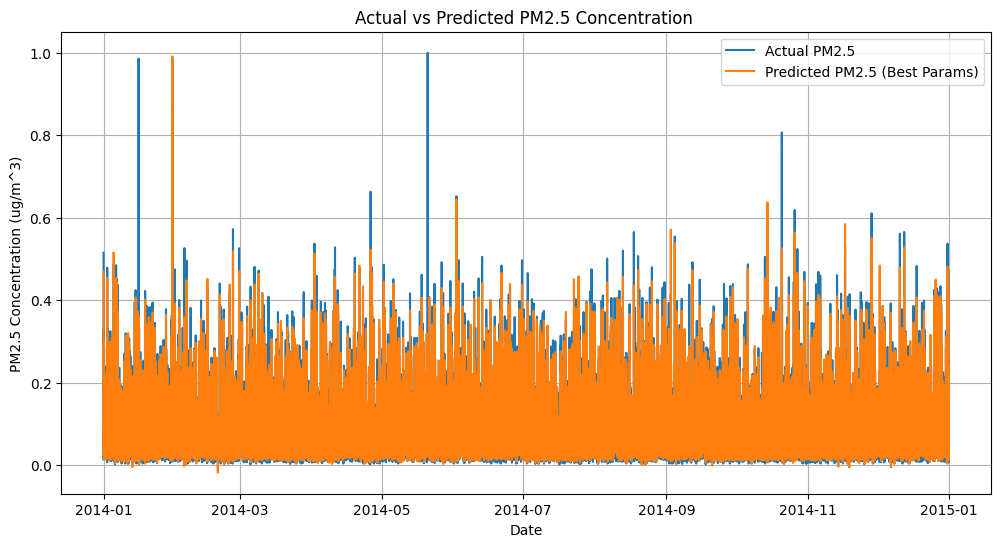

In [ ]:
# Retrieve the best hyperparameters from the completed Optuna study
best_params = study.best_trial.params

print("Training  model with best hyperparameters:", best_params)

# Build the model using the best hyperparameters found by Optuna
model = build_model(
    units=best_params['units'],
    dropout_rate=best_params['dropout_rate'],
    optimizer=best_params['optimizer'],
    l2_reg=best_params['l2_reg'],
    learning_rate=best_params['learning_rate']
)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)
val_loss = history.history['val_loss'][-1]
print("Validation Loss:", val_loss)
# Evaluate the model on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
# Reshape predictions to have a single column
predictions = predictions.reshape(-1, 1)
pm25_scaler = MinMaxScaler()
# Fit the scaler on the original 'pm2.5' column
pm25_scaler.fit(df[['pm2.5']])

# Inverse transform predictions and y_test
predictions_scaled_back = pm25_scaler.inverse_transform(predictions).flatten()
y_test_scaled_back = pm25_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled_back, predictions_scaled_back))
print(f'Model RMSE: {rmse:.4f}')

# Calculate R-squared
r2 = r2_score(y_test_scaled_back, predictions_scaled_back)
print(f' Model R-squared: {r2:.4f}')


# Plot the loss history for the final model
plot_history(history, 'LSTM Model (Best Params)')

# Plot Actual vs Predicted for the final model
dates_test = pd.date_range(start=df.index[-len(y_test_scaled_back)], periods=len(y_test_scaled_back), freq='h')

plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_scaled_back, label='Actual PM2.5')
plt.plot(dates_test, predictions_scaled_back, label='Predicted PM2.5 (Best Params)')
plt.title('Actual vs Predicted PM2.5 Concentration ')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (ug/m^3)')
plt.legend()
plt.grid(True)
plt.show()



* Validation Loss: 0.0006369792972691357
* Model RMSE: 0.0250
* Model R-squared: 0.9288


Observations:
* Training Loss decreases rapidly and stabilizes.

* Validation Loss shows some fluctuations.

* Validation Loss Value: ~0.0006369 , which is slightly better than the base model.



# Cross-validation

In [ ]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1))

# Define the learning rate
learning_rate = 0.001  # You can adjust this value

# Create an instance of the Adam optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
val_loss = history.history['val_loss'][-1]
print("Validation Loss:", val_loss)

Epoch 1/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 79s 76ms/step - loss: 0.0029 - val_loss: 8.3847e-04
Epoch 2/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - loss: 8.0022e-04 - val_loss: 6.0472e-04
Epoch 3/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - loss: 6.5064e-04 - val_loss: 6.1634e-04
Epoch 4/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 76s 77ms/step - loss: 6.7393e-04 - val_loss: 7.0747e-04
Epoch 5/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - loss: 6.5869e-04 - val_loss: 5.9946e-04
Epoch 6/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - loss: 5.9661e-04 - val_loss: 6.0413e-04
Epoch 7/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 76s 77ms/step - loss: 6.1990e-04 - val_loss: 5.8675e-04
Epoch 8/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - loss: 5.8110e-04 - val_loss: 6.4326e-04
Epoch 9/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - loss: 5.6780e-04 - val_loss: 5.7931e-04
Epoch 10/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 85s 78ms/step - loss: 5.6271e-04 - val_loss: 5.8232e-04
Validation Loss: 0.0005823154933750629


Observations: Validation Loss: 0.0005823154933750629
       
  To verify that the model works better without l2-regularization, i used different parameters.
* Models without L2 regularization achieved better validation loss compared to those with L2.
* It suggests that no need for L2 if dropout(0.1-0.3) is applied.

In [ ]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1))

# Define the learning rate
learning_rate = 0.01  # You can adjust this value

# Create an instance of the Adam optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
val_loss = history.history['val_loss'][-1]
print("Validation Loss:", val_loss)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



986/986 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - loss: 0.0311 - val_loss: 6.4359e-04
Epoch 2/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - loss: 7.2918e-04 - val_loss: 7.7643e-04
Epoch 3/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - loss: 7.2479e-04 - val_loss: 5.9056e-04
Epoch 4/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - loss: 6.6604e-04 - val_loss: 7.9999e-04
Epoch 5/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 77s 77ms/step - loss: 7.3660e-04 - val_loss: 6.6806e-04
Epoch 6/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - loss: 6.6226e-04 - val_loss: 6.3975e-04
Epoch 7/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - loss: 6.9034e-04 - val_loss: 6.0777e-04
Epoch 8/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - loss: 6.5019e-04 - val_loss: 5.8368e-04
Epoch 9/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - loss: 7.1191e-04 - val_loss: 6.3196e-04
Epoch 10/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - loss: 6.0743e-04 - val_loss: 6.4082e-04
Validation Loss: 0.0006408158806152642


Observations: Model with learning rate =0.001 performs better than the model with learning rate=0.01.

## L2 Regularization

In [ ]:
model_l2 = Sequential()
model_l2.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
               kernel_regularizer=regularizers.l2(0.00001)))  # L2 regularization added
model_l2.add(Dropout(0.2))
model_l2.add(LSTM(units=128, kernel_regularizer=regularizers.l2(0.00001)))  # L2 regularization added
model_l2.add(Dropout(0.2))
model_l2.add(Dense(1))

# Define the learning rate
learning_rate = 0.001  # You can adjust this value

# Create an instance of the Adam optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model_l2.compile(optimizer=optimizer, loss='mean_squared_error')

history = model_l2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
val_loss = history.history['val_loss'][-1]
print("Validation Loss:", val_loss)

Epoch 1/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 2/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - loss: 0.0012 - val_loss: 9.7862e-04
Epoch 3/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - loss: 9.9173e-04 - val_loss: 8.2469e-04
Epoch 4/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - loss: 8.4186e-04 - val_loss: 8.1914e-04
Epoch 5/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 76s 77ms/step - loss: 7.3306e-04 - val_loss: 8.1453e-04
Epoch 6/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - loss: 7.9771e-04 - val_loss: 7.1150e-04
Epoch 7/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - loss: 7.4007e-04 - val_loss: 7.7974e-04
Epoch 8/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - loss: 7.1715e-04 - val_loss: 6.9097e-04
Epoch 9/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - loss: 7.1679e-04 - val_loss: 6.8933e-04
Epoch 10/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - loss: 7.1516e-04 - val_loss: 7.3987e-04
Validation Loss: 0.000739868322852999


I used l2 regularization to verify that the validation loss increases after adding l2 regularization.
Observation: The validation loss increases after l2 regularization.
Possible Reasons:

* Over-regularization

* Dataset simplicity
*  Using both L2 and dropout (0.1–0.3) may excessively constrain the model.

# Step 5: Train and evaluate the final model

# Early Stopping

Early Stopping is a technique used to stop training when the model's performance on a validation set starts to degrade. This can help prevent overfitting by halting training before the model starts overfitting to the training data.

In [ ]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.19))
model.add(LSTM(units=64))
model.add(Dropout(0.19))
model.add(Dense(1))

# Define the learning rate
learning_rate = 0.0013  # You can adjust this value

# Create an instance of the Adam optimizer with the learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1,callbacks=[early_stopping])
val_loss = history.history['val_loss'][-1]
print("Validation Loss:", val_loss)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



986/986 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - loss: 0.0029 - val_loss: 9.7372e-04
Epoch 2/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - loss: 8.7156e-04 - val_loss: 6.2435e-04
Epoch 3/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - loss: 7.2713e-04 - val_loss: 6.2487e-04
Epoch 4/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - loss: 6.4256e-04 - val_loss: 7.7276e-04
Epoch 5/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 45s 35ms/step - loss: 6.0207e-04 - val_loss: 6.0223e-04
Epoch 6/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - loss: 6.8052e-04 - val_loss: 5.7226e-04
Epoch 7/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - loss: 6.1151e-04 - val_loss: 6.1153e-04
Epoch 8/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - loss: 5.9784e-04 - val_loss: 5.8857e-04
Epoch 9/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 5.9727e-04 - val_loss: 6.0126e-04
Epoch 10/10
986/986 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - loss: 5.7506e-04 - val_loss: 5.6416e-04
Validation Loss: 0.0005641623283736408


# Step 6: Plot the loss curve and predictions

274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
 Model RMSE: 0.0248
 Model R-squared: 0.9304
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


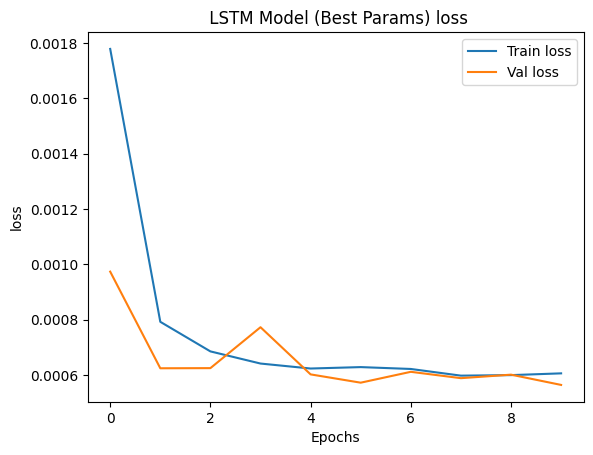

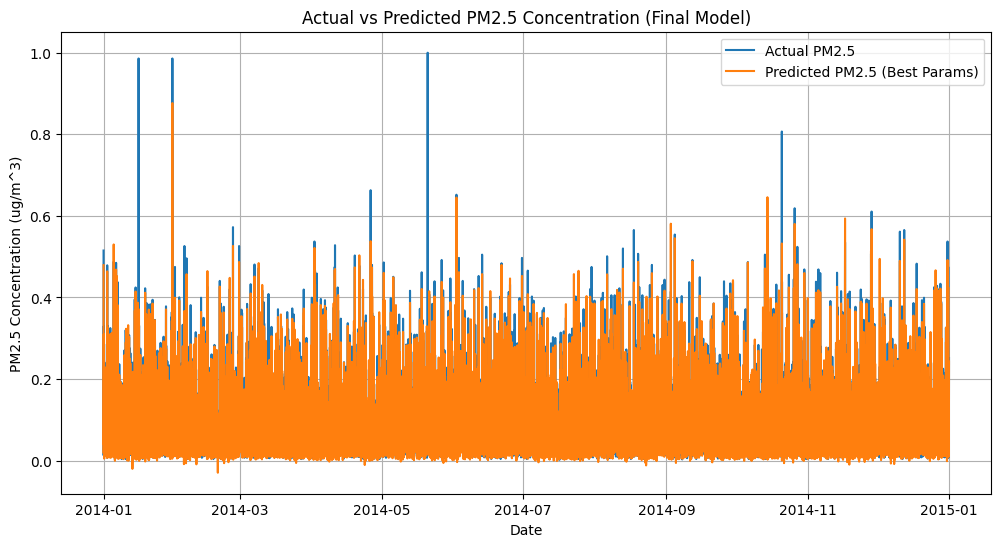

In [ ]:
# Evaluate the final model on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = predictions.reshape(-1, 1)
pm25_scaler = MinMaxScaler()
# Fit the scaler on the original 'pm2.5' column
pm25_scaler.fit(df[['pm2.5']])

# Inverse transform predictions and y_test
predictions_final_scaled_back = pm25_scaler.inverse_transform(predictions).flatten()
y_test_scaled_back = pm25_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


# Calculate RMSE
rmse_final = np.sqrt(mean_squared_error(y_test_scaled_back, predictions_final_scaled_back))
print(f' Model RMSE: {rmse_final:.4f}')

# Calculate R-squared
r2_final = r2_score(y_test_scaled_back, predictions_final_scaled_back)
print(f' Model R-squared: {r2_final:.4f}')
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the loss history for the final model
plot_history(history, ' LSTM Model (Best Params)')

# Plot Actual vs Predicted for the final model
dates_test = pd.date_range(start=df.index[-len(y_test_scaled_back)], periods=len(y_test_scaled_back), freq='h')

plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_scaled_back, label='Actual PM2.5')
plt.plot(dates_test, predictions_final_scaled_back, label='Predicted PM2.5 (Best Params)')
plt.title('Actual vs Predicted PM2.5 Concentration (Final Model)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (ug/m^3)')
plt.legend()
plt.grid(True)
plt.show()



After early stopping,
* Validation loss: 0.0005641623283736408
* Model RMSE: 0.0248
* Model R-squared: 0.9304
The validation loss decreases after adding early stopping.
To further improve the performance of the model, we can add learning rate schedulers.

##  Learning Rate Schedulers

A Learning Rate Scheduler adjusts the learning rate during training, often reducing the learning rate when the validation performance plateaus. This helps the model converge faster initially, then fine-tune toward the optimal solution by lowering the learning rate as the training progresses.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set up a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),activation="relu"))
model.add(Dropout(0.19))
model.add(LSTM(units=64,activation="relu"))
model.add(Dropout(0.19))
model.add(Dense(1))

# Compile the model with the optimizer
model.compile(optimizer="adam", loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1,callbacks=[lr_scheduler,early_stopping])
val_loss = history.history['val_loss'][-1]
print("Validation Loss:", val_loss)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



986/986 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - loss: 0.0036 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 2/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 0.0012 - val_loss: 7.1987e-04 - learning_rate: 0.0010
Epoch 3/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - loss: 9.5467e-04 - val_loss: 6.3648e-04 - learning_rate: 0.0010
Epoch 4/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - loss: 7.4831e-04 - val_loss: 5.9413e-04 - learning_rate: 0.0010
Epoch 5/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - loss: 7.8631e-04 - val_loss: 6.8926e-04 - learning_rate: 0.0010
Epoch 6/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - loss: 7.1249e-04 - val_loss: 6.0758e-04 - learning_rate: 0.0010
Epoch 7/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 7.1077e-04 - val_loss: 5.7076e-04 - learning_rate: 0.0010
Epoch 8/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 6.4228e-04 - val_loss: 5.7629e-04 - learning_rate: 2.0000e-04
Epoch 9/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - los

274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Final Model RMSE: 0.0247
Final Model R-squared: 0.9308
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


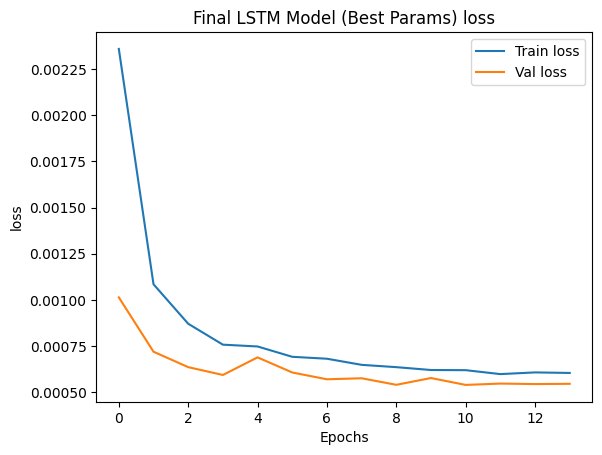

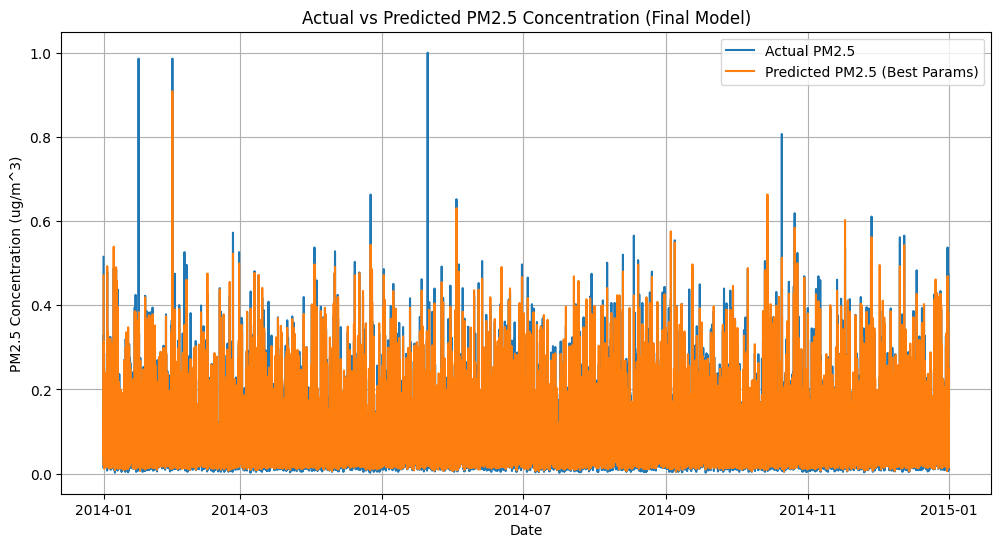

In [ ]:
# Evaluate the final model on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = predictions.reshape(-1, 1)
pm25_scaler = MinMaxScaler()
# Fit the scaler on the original 'pm2.5' column
pm25_scaler.fit(df[['pm2.5']])

# Inverse transform predictions and y_test
predictions_final_scaled_back = pm25_scaler.inverse_transform(predictions).flatten()
y_test_scaled_back = pm25_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


# Calculate RMSE
rmse_final = np.sqrt(mean_squared_error(y_test_scaled_back, predictions_final_scaled_back))
print(f'Final Model RMSE: {rmse_final:.4f}')

# Calculate R-squared
r2_final = r2_score(y_test_scaled_back, predictions_final_scaled_back)
print(f'Final Model R-squared: {r2_final:.4f}')
# Make predictions on the test set
y_pred = model.predict(X_test)
# Plot the loss history for the final model
plot_history(history, 'Final LSTM Model (Best Params)')

# Plot Actual vs Predicted for the final model
dates_test = pd.date_range(start=df.index[-len(y_test_scaled_back)], periods=len(y_test_scaled_back), freq='h')

plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_scaled_back, label='Actual PM2.5')
plt.plot(dates_test, predictions_final_scaled_back, label='Predicted PM2.5 (Best Params)')
plt.title('Actual vs Predicted PM2.5 Concentration (Final Model)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (ug/m^3)')
plt.legend()
plt.grid(True)
plt.show()



Result:
* Final model Validation loss: 0.0005462467088364065
* Final Model RMSE: 0.0247
* Final Model R-squared: 0.9308
* The overall performance of the model improves after the learning rate scheduler.
      
In the loss curve,
* Validation Loss is consistently low and flat after a few epochs.

